## 딥러닝의 과정

1. 데이터 분석

2. 모델 선택

3. 훈련

4. 결과 추론

In [1]:
import numpy as np
import pandas as pd

In [2]:
import sklearn

In [3]:
sklearn.__version__

'0.22.1'

In [5]:
# 파일로부터 데이터를 읽어 오기
# thousands=',' : ',' 로 구분되어 있다
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands=',')

In [6]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [11]:
# endcoding='latin1' : ?
# sep='\t' : ?
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',', encoding='latin1', na_values='n/a', sep='\t')

In [12]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [13]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")     #pivot : 
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)     # 2015라는 column을 GDP per capita로 Rename
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,      # merge사용 시 어떤 값을 기준으로 합치는지가 중요
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]   # Life satisfaction 부분만 추출

In [18]:
contry_stats = prepare_country_stats(oecd_bli,gdp_per_capita)

KeyError: "None of ['Country'] are in the columns"

In [19]:
contry_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [20]:
contry_stats.tail()

,GDP per capita,Life satisfaction
Country,,
Iceland,50854.583,7.5
Australia,50961.865,7.3
Ireland,51350.744,7.0
Denmark,52114.165,7.5
United States,55805.204,7.2


In [22]:
contry_stats.shape

(29, 2)

In [23]:
X = contry_stats['GDP per capita']

In [24]:
X

Country
Russia              9054.914
Turkey              9437.372
Hungary            12239.894
Poland             12495.334
Slovak Republic    15991.736
Estonia            17288.083
Greece             18064.288
Portugal           19121.592
Slovenia           20732.482
Spain              25864.721
Korea              27195.197
Italy              29866.581
Japan              32485.545
Israel             35343.336
New Zealand        37044.891
France             37675.006
Belgium            40106.632
Germany            40996.511
Finland            41973.988
Canada             43331.961
Netherlands        43603.115
Austria            43724.031
United Kingdom     43770.688
Sweden             49866.266
Iceland            50854.583
Australia          50961.865
Ireland            51350.744
Denmark            52114.165
United States      55805.204
Name: GDP per capita, dtype: float64

In [25]:
X.shape

(29,)

In [26]:
X = np.c_[contry_stats['GDP per capita']]   # 한 열에 데이터를 갖게 변경

In [27]:
X.shape

(29, 1)

In [28]:
X

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583],
       [50961.865],
       [51350.744],
       [52114.165],
       [55805.204]])

In [29]:
y = np.c_[contry_stats['Life satisfaction']]

In [30]:
y

array([[6. ],
       [5.6],
       [4.9],
       [5.8],
       [6.1],
       [5.6],
       [4.8],
       [5.1],
       [5.7],
       [6.5],
       [5.8],
       [6. ],
       [5.9],
       [7.4],
       [7.3],
       [6.5],
       [6.9],
       [7. ],
       [7.4],
       [7.3],
       [7.3],
       [6.9],
       [6.8],
       [7.2],
       [7.5],
       [7.3],
       [7. ],
       [7.5],
       [7.2]])

In [31]:
y.shape

(29, 1)

In [32]:
import matplotlib.pyplot as plt

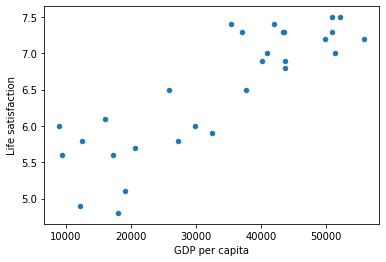

In [33]:
contry_stats.plot(kind='scatter', x = 'GDP per capita', y = 'Life satisfaction')

In [37]:
# 선형 모델 사용
import sklearn.linear_model

In [38]:
# 선형 회귀 모델로 학습
model = sklearn.linear_model.LinearRegression()

In [39]:
#training
#fit을 이용하여 학습
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# t0와 t1에 왜 이런 값을 넣는가?
t0, t1 = model.intercept_[0], model.coef_[0][0]

In [42]:
t0, t1

(4.853052800266436, 4.911544589158484e-05)

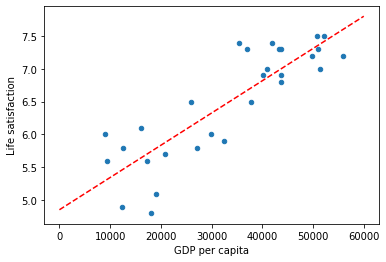

In [43]:
# 선형회귀 학습 결과 출력
contry_stats.plot(kind='scatter', x = 'GDP per capita', y = 'Life satisfaction')
X = np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1 * X, 'r--')


In [44]:
X_new = [[22587]]   # 키프로스 1인당 GDP
print(model.predict(X_new)) # X_new 값을 바탕으로 학습한 모델을 통해 결과 값 예측

[[5.96242338]]


In [45]:
# 사례기반 : k-nearnest neighbors regression (K-최근점 이웃 회귀)
# 가장 가까운 k개의 값을 평균내서 결과값 예측
import sklearn.neighbors

In [46]:
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [47]:
X = np.c_[contry_stats['GDP per capita']]

In [48]:
# model training
knn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [49]:
# 예측값 출력
print(knn.predict(X_new))

[[5.76666667]]


In [50]:
# 파일로 부터 데이터를 읽어 오기
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',', encoding='latin1', na_values='n/a', sep='\t')

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")     #pivot : 
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)     # 2015라는 column을 GDP per capita로 Rename
gdp_per_capita.set_index("Country", inplace=True)
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,      # merge사용 시 어떤 값을 기준으로 합치는지가 중요
                                left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

reduced_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]
full_data    = full_country_stats[["GDP per capita", 'Life satisfaction']]

In [51]:
reduced_data.shape

(29, 2)

In [52]:
missing_data.shape

(7, 2)

In [53]:
full_data.shape

(36, 2)

In [54]:
X_full = np.c_[full_data['GDP per capita']]
y_full = np.c_[full_data['Life satisfaction']]

In [55]:
model_full = sklearn.linear_model.LinearRegression()
model_full.fit(X_full, y_full)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
t0_f, t1_f = model_full.intercept_[0], model_full.coef_[0][0]

In [57]:
t0_f, t1_f      # full data를 사용하면 값이 많이 변함

(5.763029861307918, 2.3177337047396075e-05)

In [58]:
t0, t1

(4.853052800266436, 4.911544589158484e-05)

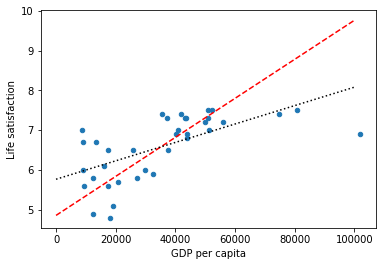

In [64]:
full_data.plot(kind='scatter', x = 'GDP per capita', y = 'Life satisfaction')   # outlier가 존재함
#missing_data.plot(style='rs', x = 'GDP per capita', y = 'Life satisfaction')
X = np.linspace(0, 100000, 1000)
plt.plot(X, t0 + t1 * X, 'r--')         # outlier를 일부 제거하고 학습한 결과 : 빨간색 선
plt.plot(X, t0_f + t1_f * X, 'k:' )     # 전체 데이터를 갖고 학습한 결과 : 검은색 선
plt.show()